# Titanic Project
# Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Importing Liberaries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading Datasets
df = pd.read_csv("E:/Datatrained/Practice Project/Titanic Project/titanic_train.csv")

In [3]:
#Checking randam samples
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S


In [4]:
#Checking shape of datasets
df.shape

(891, 12)

In [5]:
#Checking Uniqueness
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
#Checking Uniqueness
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [7]:
#Checking Uniqueness
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
#Checking Uniqueness
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
#Checking Uniqueness
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Features like PassengerId,SibSp,Cabin, Ticket, Name and Embarked will not add any values in predicting whether person will survive or not. So we will remove them from datasets

In [10]:
#Removing unncessary columns
df_new = df.drop(columns=['PassengerId','SibSp','Cabin', 'Ticket', 'Name', 'Embarked'], axis=1)
df_new

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,male,22.0,0,7.2500
1,1,1,female,38.0,0,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,0,53.1000
4,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000
887,1,1,female,19.0,0,30.0000
888,0,3,female,NaN,2,23.4500
889,1,1,male,26.0,0,30.0000


In [11]:
pd.set_option('display.max_rows', None) #This code will help to display max number of rows

In [12]:
#Describe numerical datasets
df_new.describe()

,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.381594,32.204208
std,0.486592,0.836071,14.526497,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,6.000000,512.329200


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


# Checking Null Values in the datasets

In [14]:
df_new.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
Parch        0.00000
Fare         0.00000
dtype: float64

Observed good amount of datapoint missing in features Age which will be handled further

# Checking Dependent Variable

In [15]:
df_new["Survived"].unique()

array([0, 1], dtype=int64)

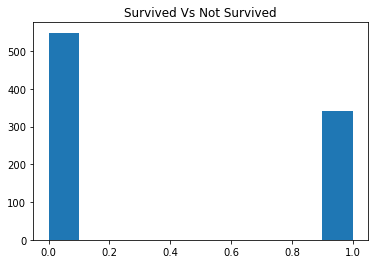

In [16]:
df['Survived'].hist(grid=False)
plt.title("Survived Vs Not Survived")
plt.show()

I observed the dependent variable is imbalance which need to be handled in further steps

# Encoding and Imputing

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_new["Sex"] = LE.fit_transform(df_new['Sex'])
df_new["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

Categorical feature Sex has been encoded as binary form

In [18]:
df_new.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,1,22.0,0,7.2500
1,1,1,0,38.0,0,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,0,53.1000
4,0,3,1,35.0,0,8.0500


# Split features from independent and dependent feature

In [19]:
x = df_new.drop(("Survived"), axis=1)
y = df_new["Survived"]

In [20]:
x

,Pclass,Sex,Age,Parch,Fare
0,3,1,22.00,0,7.2500
1,1,0,38.00,0,71.2833
2,3,0,26.00,0,7.9250
3,1,0,35.00,0,53.1000
4,3,1,35.00,0,8.0500
5,3,1,NaN,0,8.4583
6,1,1,54.00,0,51.8625
7,3,1,2.00,1,21.0750
8,3,0,27.00,2,11.1333
9,2,0,14.00,0,30.0708


In [21]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


Replacing if any blank datapoint with nan

In [24]:
df_new['Age'] = df_new['Age'].replace('', np.nan)

In [25]:
df_new['Age'] = df_new['Age'].fillna(df_new['Age'].mean())

In [26]:
df_new.describe()

,Survived,Pclass,Sex,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,6.000000,512.329200


In [27]:
df_new.to_csv('E:/Datatrained/Practice Project/Titanic Project/file1.csv')

# Checking the Correlation

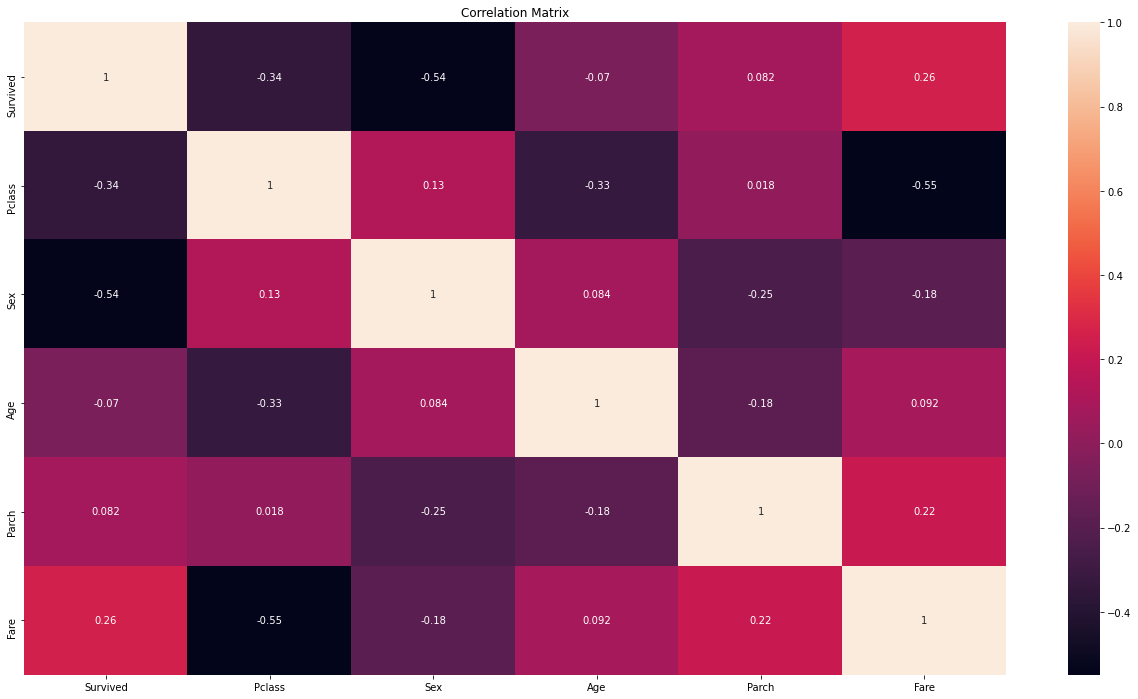

In [28]:
corr_mat = df_new.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

-ve Correlation show between Survived and Sex & Pclass are slight +ve correlation shows in between Fare & Survived

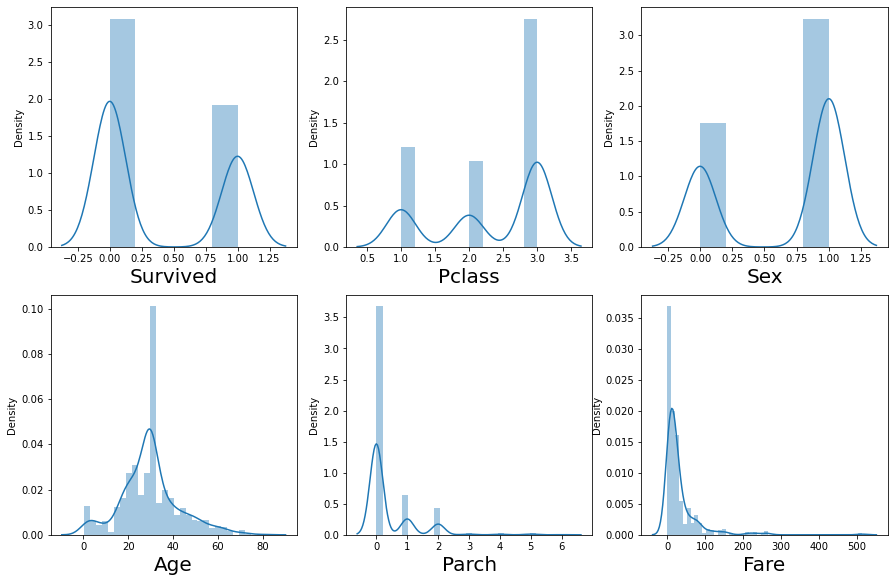

In [29]:
#Lets see how data are distributed in every column
plt.figure(figsize=(15,15), facecolor = 'white')
slide = 1
for column in df_new:
    if slide<=6: #Since number of column are 6 in datasets
        ax = plt.subplot(3,3, slide)
        sns.distplot(df_new[column])
        plt.xlabel(column, fontsize=20)
    slide +=1
plt.show()

From above plots, we can see the datasets are not distributed properly and noticed skewness in features Parch and Fare which will be handled in further steps

In [30]:
df_new.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Parch       2.749117
Fare        4.787317
dtype: float64

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


# Coverting all the datatype into float

In [32]:
df_new['Sex'] = df_new['Sex'].apply(float)
df_new['Survived'] = df_new['Survived'].apply(float)
df_new['Pclass'] = df_new['Pclass'].apply(float)
df_new['Parch'] = df_new['Parch'].apply(float)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [33]:
df_new['Sex'].unique()

array([1., 0.])

In [34]:
df_new['Survived'].unique()


array([0., 1.])

In [35]:
df_new['Pclass'].unique()

array([3., 1., 2.])

In [36]:
df_new['Parch'].unique()

array([0., 1., 2., 5., 3., 4., 6.])

# Handle Skewness in datasets

In [37]:
from sklearn.preprocessing import power_transform
x_new = power_transform(df_new)
#will convert data into dataframe for further use after transforming dataset from arrays
x1 = pd.DataFrame(x_new, columns=df_new.columns)

In [38]:
x1.skew().sort_values(ascending=False)

Parch       1.228795
Survived    0.478523
Age         0.064420
Fare       -0.040329
Pclass     -0.441438
Sex        -0.618921
dtype: float64

Skewness have been removed from each column so we can proceed further

# Scaling

In [39]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x1)

In [40]:
x_scaled

array([[-0.78927234,  0.86397329,  0.73769513, -0.55626693, -0.56025296,
        -0.87882001],
       [ 1.2669898 , -1.45912855, -1.35557354,  0.65726854, -0.56025296,
         1.33665056],
       [ 1.2669898 ,  0.86397329, -1.35557354, -0.24157742, -0.56025296,
        -0.79006485],
       ...,
       [-0.78927234,  0.86397329, -1.35557354,  0.04200106,  1.84685634,
         0.28888536],
       [ 1.2669898 , -1.45912855,  0.73769513, -0.24157742, -0.56025296,
         0.52790578],
       [-0.78927234,  0.86397329,  0.73769513,  0.21525442, -0.56025296,
        -0.81234947]])

In [41]:
x2 = pd.DataFrame(x_scaled, columns = x1.columns)
x2

,Survived,Pclass,Sex,Age,Parch,Fare
0,-0.789272,0.863973,0.737695,-0.556267,-0.560253,-0.878820
1,1.266990,-1.459129,-1.355574,0.657269,-0.560253,1.336651
2,1.266990,0.863973,-1.355574,-0.241577,-0.560253,-0.790065
3,1.266990,-1.459129,-1.355574,0.437923,-0.560253,1.067352
4,-0.789272,0.863973,0.737695,0.437923,-0.560253,-0.774439
5,-0.789272,0.863973,0.737695,0.042001,-0.560253,-0.725002
6,-0.789272,-1.459129,0.737695,1.781551,-0.560253,1.045516
7,-0.789272,0.863973,0.737695,-2.374696,1.729206,0.184264
8,1.266990,0.863973,-1.355574,-0.164262,1.846856,-0.449944
9,1.266990,-0.592604,-1.355574,-1.218469,-0.560253,0.530176


In [42]:
x2.shape

(891, 6)

# Checking Outliers

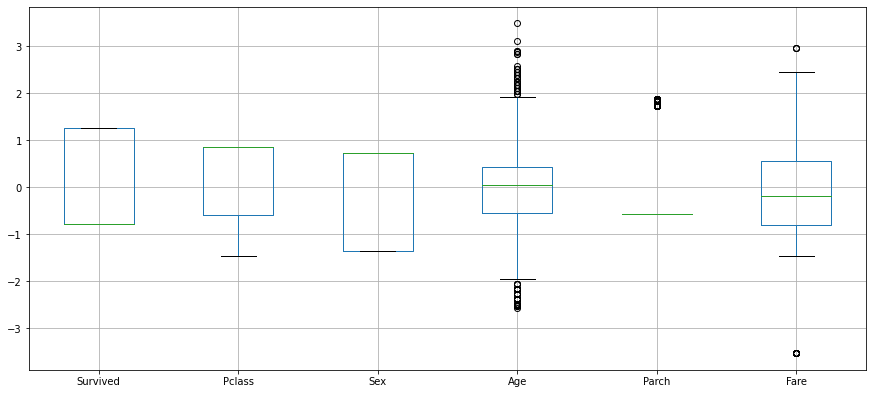

In [43]:
#Ploting box plots for first 30 columns
x2.boxplot(figsize=[15,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Observed outliers mostly in feature Age which will be handled in further steps

# Lets Quantify the outliers

In [44]:
from scipy.stats import zscore
(np.abs(zscore(x2))<5).all()

True

# Removing Outliers

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Find the IQR to identify the outliers

#1st quantile
q1 = x2.quantile(0.25)
#3rd quantile
q3 = x2.quantile(0.75)
#IQR
IQR = q3-q1



In [46]:
#Validating outlier for column Age with upper limit

Age_high = (q3.Age + (1.5 * IQR.Age))
print(Age_high)
index = np.where(x2['Age']>Age_high)
x2 = x2.drop(x2.index[index])
print(x2.shape)
x2.reset_index()

1.929209059221546
(856, 6)


,index,Survived,Pclass,Sex,Age,Parch,Fare
0,0,-0.789272,0.863973,0.737695,-0.556267,-0.560253,-0.878820
1,1,1.266990,-1.459129,-1.355574,0.657269,-0.560253,1.336651
2,2,1.266990,0.863973,-1.355574,-0.241577,-0.560253,-0.790065
3,3,1.266990,-1.459129,-1.355574,0.437923,-0.560253,1.067352
4,4,-0.789272,0.863973,0.737695,0.437923,-0.560253,-0.774439
5,5,-0.789272,0.863973,0.737695,0.042001,-0.560253,-0.725002
6,6,-0.789272,-1.459129,0.737695,1.781551,-0.560253,1.045516
7,7,-0.789272,0.863973,0.737695,-2.374696,1.729206,0.184264
8,8,1.266990,0.863973,-1.355574,-0.164262,1.846856,-0.449944
9,9,1.266990,-0.592604,-1.355574,-1.218469,-0.560253,0.530176


In [47]:
#Validating outlier for column Age with lower limit

Age_low = (q1.Age -(1.5 * IQR.Age))
print(Age_low)
index = np.where(x2['Age']<Age_low)
x2 = x2.drop(x2.index[index])
print(x2.shape)
x2.reset_index()

-2.0475525298132706
(812, 6)


,index,Survived,Pclass,Sex,Age,Parch,Fare
0,0,-0.789272,0.863973,0.737695,-0.556267,-0.560253,-0.878820
1,1,1.266990,-1.459129,-1.355574,0.657269,-0.560253,1.336651
2,2,1.266990,0.863973,-1.355574,-0.241577,-0.560253,-0.790065
3,3,1.266990,-1.459129,-1.355574,0.437923,-0.560253,1.067352
4,4,-0.789272,0.863973,0.737695,0.437923,-0.560253,-0.774439
5,5,-0.789272,0.863973,0.737695,0.042001,-0.560253,-0.725002
6,6,-0.789272,-1.459129,0.737695,1.781551,-0.560253,1.045516
7,8,1.266990,0.863973,-1.355574,-0.164262,1.846856,-0.449944
8,9,1.266990,-0.592604,-1.355574,-1.218469,-0.560253,0.530176
9,12,-0.789272,0.863973,0.737695,-0.717255,-0.560253,-0.774439


In [48]:
#Validating one outlier for column Parch
#Par_high = (q3.Parch + (1.5 * IQR.Parch))
#print(Par_high)
#index = np.where(x2['Parch']>Par_high)
#x2 = x2.drop(x2.index[index])
#print(x2.shape)
#x2.reset_index()

Checking outliers again after removing outliers

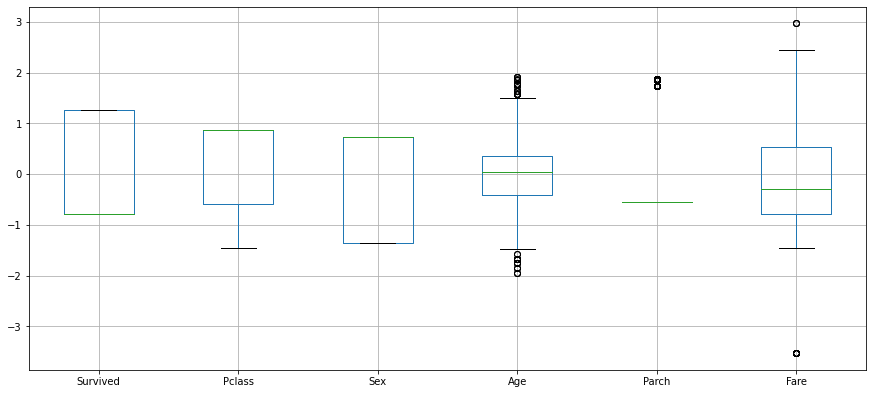

In [49]:
#Ploting box plots
x2.boxplot(figsize=[15,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers are almost handled in each features

# Checking distribution in Dependent variable

0    549
1    342
Name: Survived, dtype: int64


AxesSubplot(0.260833,0.125;0.503333x0.755)


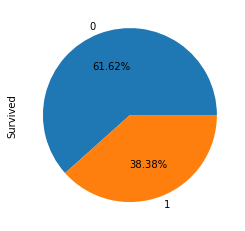

In [50]:
print(y.value_counts())
print('\n')
print(y.value_counts().plot.pie(autopct='%0.2f%%'))

Dependent Variable shows imbalance which will be handled using random oversampling in the next steps

In [51]:
# splitting data training & testing data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 5) (179, 5) (712,) (179,)


# Random Oversampling

In [52]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

0    549
1    549
Name: Survived, dtype: int64


AxesSubplot(0.260833,0.125;0.503333x0.755)


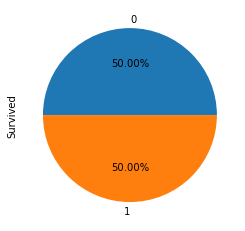

In [53]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train, y_train = ros.fit_resample(x, y)
print(y_train.value_counts())
print('\n')
print(y_train.value_counts().plot.pie(autopct='%0.2f%%'))

# Model Training Begins

1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. DecisionTreeClassifier
5. SVC
6. GaussianNB

In [54]:
def model_building(model):
    models = model
    X_train.fillna(X_train.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    print(f'Accuracy Score DecisonTreeClassifer: {accuracy_score(y_test, y_pred)}', '\n')
    print(f'Classification Report DecisonTreeClassifer: \n{classification_report(y_test, y_pred)}', '\n')
    print(f'Confusion Matrix DecisonTreeClassifer: \n{confusion_matrix(y_test, y_pred)}', '\n')
    print(f'Cross Val Score {cross_val_score(models, x, y, cv=5).mean()}')
    print('\n')
    prob_estimates = model.predict_proba(X_test)
    
    fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
    nilai_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'AUC: {nilai_auc}')
    plt.plot([0,1], [0,1], 'r--', label='Random Classifier')
    plt.title('ROC: Receiver Operating Charateristic')
    plt.ylabel('Recall or True Positive Rate')
    plt.xlabel('Fallout or False Positive Rate')
    plt.legend()
    plt.show()

Make custom function for model building

# 1. LogisticRegression

Accuracy Score DecisonTreeClassifer: 0.8044692737430168 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       110
           1       0.71      0.83      0.77        69

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179
 

Confusion Matrix DecisonTreeClassifer: 
[[87 23]
 [12 57]] 

Cross Val Score nan




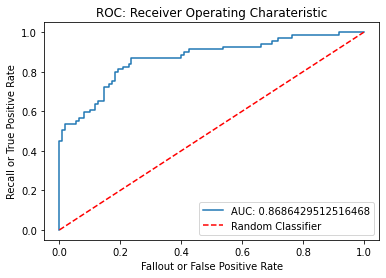

In [55]:
model_building(LogisticRegression())

# 2. RandomForestClassifier

Accuracy Score DecisonTreeClassifer: 0.9888268156424581 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       0.99      0.99      0.99        69

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179
 

Confusion Matrix DecisonTreeClassifer: 
[[109   1]
 [  1  68]] 

Cross Val Score nan




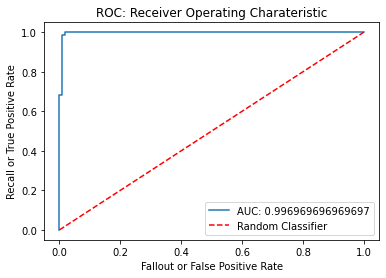

In [56]:
model_building(RandomForestClassifier(n_estimators=100))

# 3. KNeighborsClassifier

Accuracy Score DecisonTreeClassifer: 0.8770949720670391 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       110
           1       0.81      0.90      0.85        69

    accuracy                           0.88       179
   macro avg       0.87      0.88      0.87       179
weighted avg       0.88      0.88      0.88       179
 

Confusion Matrix DecisonTreeClassifer: 
[[95 15]
 [ 7 62]] 

Cross Val Score nan




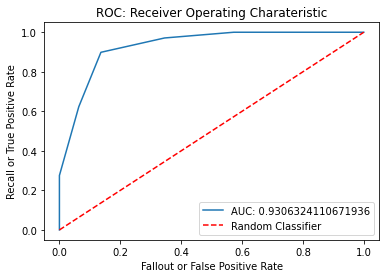

In [57]:
model_building(KNeighborsClassifier(n_neighbors=5))

# 4. DecisionTreeClassifier

Accuracy Score DecisonTreeClassifer: 0.9888268156424581 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       0.99      0.99      0.99        69

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179
 

Confusion Matrix DecisonTreeClassifer: 
[[109   1]
 [  1  68]] 

Cross Val Score nan




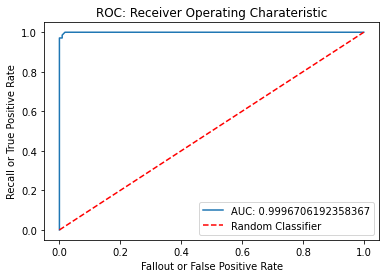

In [58]:
model_building(DecisionTreeClassifier())

# 5. SVC

Accuracy Score DecisonTreeClassifer: 0.7318435754189944 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       110
           1       0.66      0.62      0.64        69

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179
 

Confusion Matrix DecisonTreeClassifer: 
[[88 22]
 [26 43]] 

Cross Val Score nan




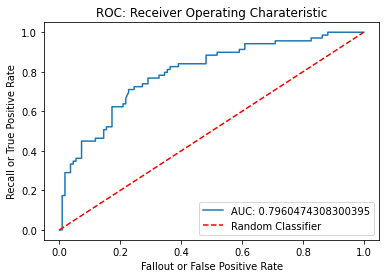

In [59]:
model_building(SVC(probability=True))

# 6. GaussianNB

Accuracy Score DecisonTreeClassifer: 0.7877094972067039 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.70      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179
 

Confusion Matrix DecisonTreeClassifer: 
[[87 23]
 [15 54]] 

Cross Val Score nan




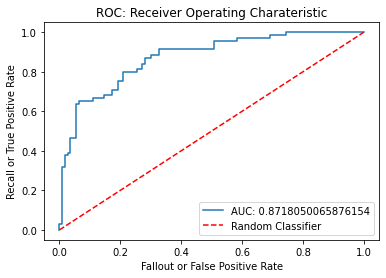

In [60]:
model_building(GaussianNB())

Make plotting to see the best performance of the model

In [61]:
# get the accuracy score & cross val score first

mod_name = [LogisticRegression(), RandomForestClassifier(n_estimators=100), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), 
            SVC(), GaussianNB()]
acc_mod = []
cv_mod = []

for mod in mod_name:
    models = mod
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    acc_mod.append(accuracy_score(y_test, y_pred))
    cv_mod.append(cross_val_score(models, x, y, cv=5).mean())

print(f'Accuracy Model: {acc_mod}', '\n')
print(f'Cross Val Score Model: {cv_mod}', '\n')

Accuracy Model: [0.8044692737430168, 0.9832402234636871, 0.8770949720670391, 0.9888268156424581, 0.7318435754189944, 0.7877094972067039] 

Cross Val Score Model: [nan, nan, nan, nan, nan, nan] 



# DecisionTreeClassifier showing highest accuracy

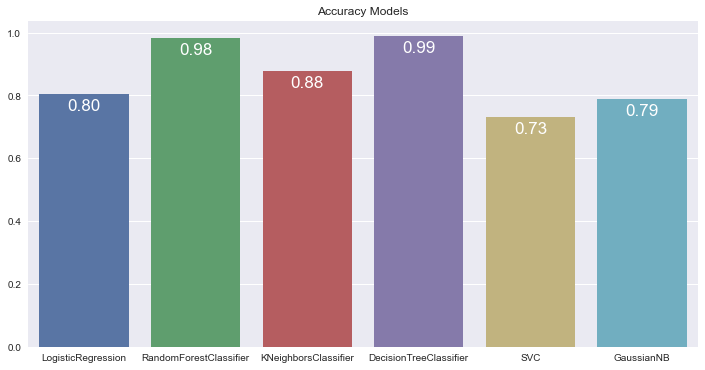

In [62]:
# plotting performance model
models_names = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
                'SVC', 'GaussianNB']


plt.style.use('seaborn')
plt.subplots(figsize=(12,6))
bar = sns.barplot(x=models_names, y=acc_mod, ci=False)
for i in bar.patches:
    bar.annotate(format(i.get_height(), '.2f'),
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', color='white', size=17, xytext=(0,-12),
                 textcoords='offset points')
plt.title(f'Accuracy Models')
plt.show()

# Get best parameters for model using RandomizedSearchCV

In [63]:
model_params = {
    "RandomForestClassifier" : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [60,80,100],
            "bootstrap" : [True],
            "max_depth" : [60,80,100,120],
            "min_samples_leaf" : [2,3,5,7],
            "min_samples_split" : [10,12,14],
            "max_features" : [2,3,4,5]
        }
    },
    
    "KNeighborsClassifier" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [2,3,4,5,6],
            "leaf_size" : [50,60,70,80],
            "n_jobs" : [-1,1]
        }
    },
    
    "DecisionTreeClassifier" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "criterion" : ['gini','entropy'],
            "max_depth" : [60,70,80,90],
            "min_samples_leaf" : [7,8,9],
            "min_samples_split" : [10,11,12]
        }
    },
    
    "LogisticRegression" : {
        "model" : LogisticRegression(solver='liblinear', multi_class='auto'),
        "params" : {
            "C" : [1,5,10]
        }
    },
    
    "SVC" : {
        "model" : SVC(),
        "params" : {
            "C" : [1.0, 1.5, 2.0],
            "kernel" : ['linear', 'rbf'],
            "gamma" : ['scale', 'auto']
        }
    },
    
    "GaussianNB" : {
        "model" : GaussianNB(),
        "params" : {
            "priors" : [None],
            "var_smoothing" : [1e-09]
        }
    }
}

In [64]:
# scores = []

for model_name, model_par in model_params.items():
    res = RandomizedSearchCV(model_par['model'], model_par['params'], cv=5, n_iter=3, return_train_score=False)
    res.fit(X_train, y_train)
    print(f'Model {model_name}, Best Scores: {res.best_score_}')

Model RandomForestClassifier, Best Scores: 0.8507139892071398
Model KNeighborsClassifier, Best Scores: 0.746936488169365
Model DecisionTreeClassifier, Best Scores: 0.8097384806973847
Model LogisticRegression, Best Scores: 0.7841967621419677
Model SVC, Best Scores: 0.7769074304690743
Model GaussianNB, Best Scores: 0.7714487339144874


In [65]:
for model_name, model_par in model_params.items():
    res = RandomizedSearchCV(model_par['model'], model_par['params'], cv=5, n_iter=3, return_train_score=False)
    res.fit(X_train, y_train)
    print(f'Model {model_name}, Best Params: {res.best_params_}\n')

Model RandomForestClassifier, Best Params: {'n_estimators': 80, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 120, 'bootstrap': True}

Model KNeighborsClassifier, Best Params: {'n_neighbors': 2, 'n_jobs': -1, 'leaf_size': 70}

Model DecisionTreeClassifier, Best Params: {'min_samples_split': 12, 'min_samples_leaf': 7, 'max_depth': 90, 'criterion': 'gini'}

Model LogisticRegression, Best Params: {'C': 10}

Model SVC, Best Params: {'kernel': 'linear', 'gamma': 'scale', 'C': 1.5}

Model GaussianNB, Best Params: {'var_smoothing': 1e-09, 'priors': None}



# Predict new data with DecisionTreeClassifier

In [69]:
# DecisionTreeClassifier
mod_tree = DecisionTreeClassifier(min_samples_split=12, min_samples_leaf=7, max_depth=90, criterion='gini')
mod_tree.fit(X_train, y_train)
y_pred_tree = mod_tree.predict(X_test)
print(f'Accuracy Score DecisonTreeClassifer: {accuracy_score(y_test, y_pred_tree)}', '\n')
print(f'Classification Report DecisonTreeClassifer: \n{classification_report(y_test, y_pred_tree)}', '\n')
print(f'Confusion Matrix DecisonTreeClassifer: \n{confusion_matrix(y_test, y_pred_tree)}', '\n')
print(f'Cross Val Score {cross_val_score(mod_tree, x, y, cv=5).mean()}')

Accuracy Score DecisonTreeClassifer: 0.888268156424581 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       110
           1       0.85      0.87      0.86        69

    accuracy                           0.89       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179
 

Confusion Matrix DecisonTreeClassifer: 
[[99 11]
 [ 9 60]] 

Cross Val Score nan


In [70]:
import joblib
joblib.dump(RandomForestClassifier, "Titanic_Project.pkl")

['Titanic_Project.pkl']

In [71]:
m = joblib.load("Titanic_Project.pkl")

# Note: Cross Validation shows nan where i need help to understand why it is so